In [46]:
!pip install seaborn
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("loan_data.csv").drop("LoanID",axis=1)
features=data.drop("Default",axis=1)

In [2]:
encoded=pd.get_dummies(data,drop_first=True)
encoded.to_csv("saved_data/one_hot_encoded_data.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_vars=features.select_dtypes(exclude="object")
scaled=scaler.fit_transform(numeric_vars)
numeric_cols=numeric_vars.columns
scaled_df=pd.DataFrame(scaled,columns=numeric_cols)

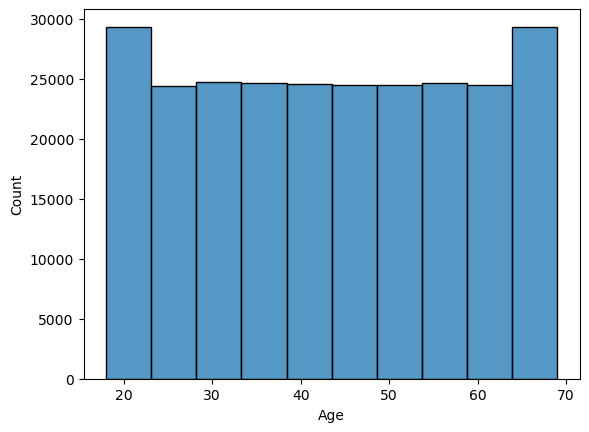

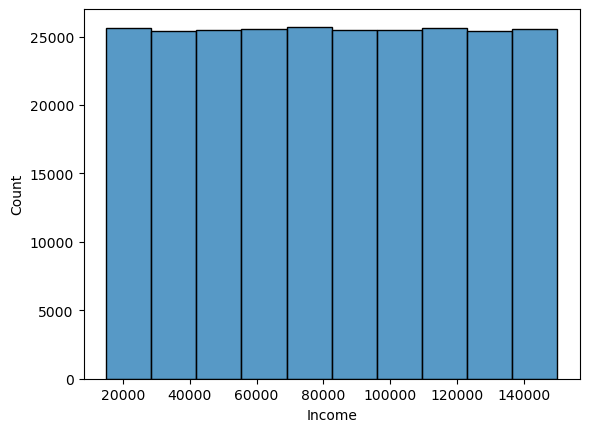

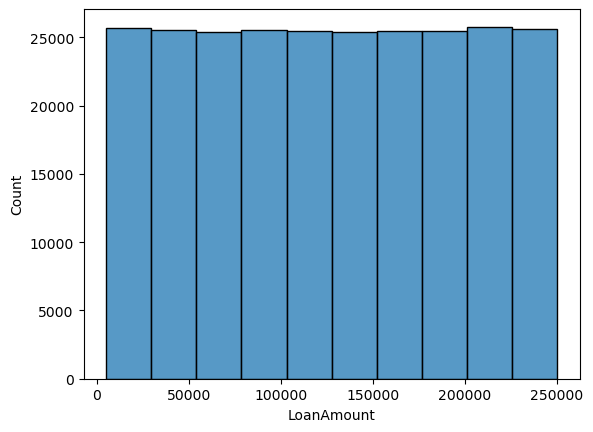

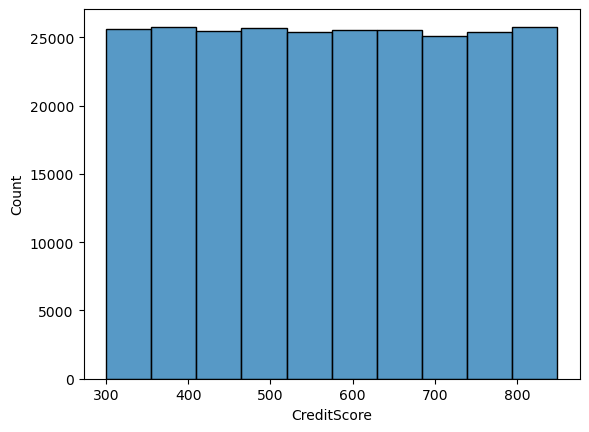

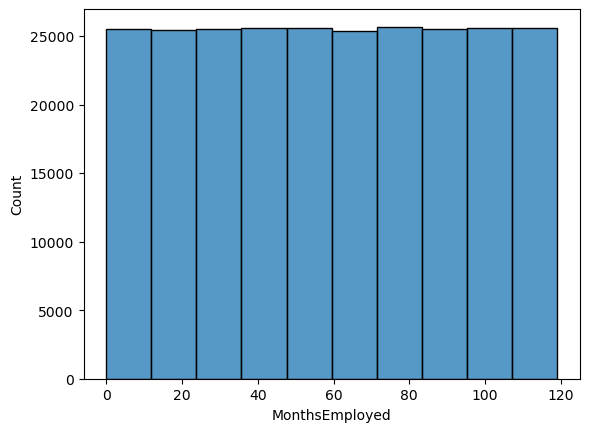

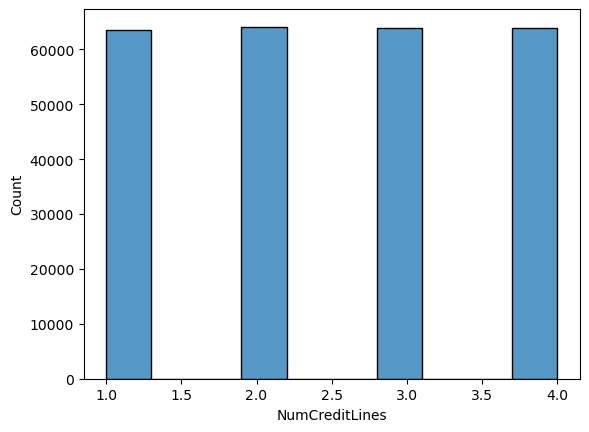

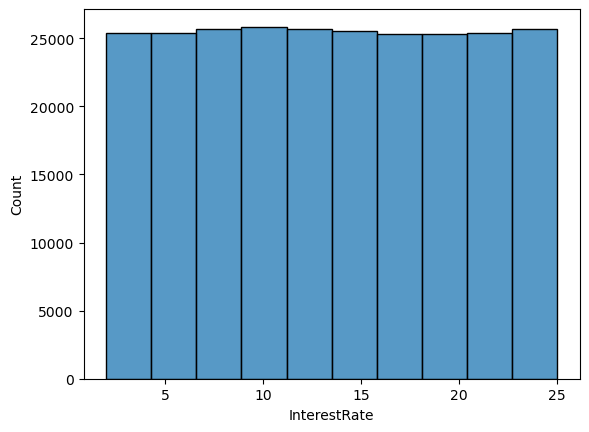

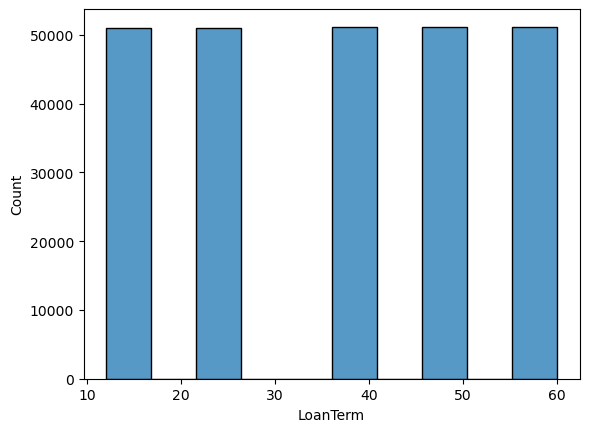

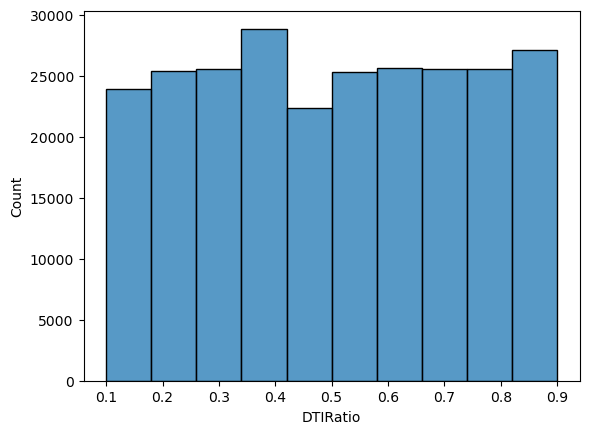

In [4]:
for col in numeric_cols:
    sns.histplot(numeric_vars[col],bins=10)
    plt.show()

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(scaled_df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const             1.000000
Age               1.000031
Income            1.000022
LoanAmount        1.000029
CreditScore       1.000007
MonthsEmployed    1.000022
NumCreditLines    1.000008
InterestRate      1.000013
LoanTerm          1.000016
DTIRatio          1.000033
dtype: float64